# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 140)
pd.set_option('display.max_columns', 35)
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [3]:
df0 = pd.read_excel('World military power.xlsx',header=1)

In [4]:
df = df0.copy()

# EDA

## Implement basic steps to see how is your data looks like

In [5]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,...,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,...,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,...,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,...,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
3,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,Angola,...,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
4,Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000,Argentina,...,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.000,Argentina,11000.000,Argentina,11968.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [7]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
count,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,124.000,115.000,115.000,115.000,115.000,138.000,129.000
mean,1.461,388.471,81.565,25.761,30.232,82.833,154.065,25.623,646.565,2485.696,212.159,393.978,156.935,84.984,0.383,4.800,2.052,3.522,290.043,3964.225
std,1.324,1231.982,230.325,94.528,92.330,240.804,520.184,97.326,1515.464,5410.546,688.029,805.782,484.381,146.114,1.972,13.707,10.001,6.481,1212.967,3760.100
min,0.061,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,29.000
25%,0.575,33.000,0.000,0.000,3.000,4.250,15.250,0.000,19.250,250.250,0.000,24.250,0.000,10.000,0.000,0.000,0.000,0.000,33.500,1587.000
50%,1.034,111.000,17.000,0.000,9.000,26.000,44.000,2.000,153.000,734.500,23.000,108.000,24.000,38.000,0.000,0.000,0.000,0.000,68.000,2816.000
75%,2.022,290.250,60.500,15.750,26.000,79.250,126.750,17.750,436.250,2000.000,97.250,296.500,99.750,77.750,0.000,4.000,0.000,5.500,150.750,5267.000
max,10.168,13264.000,2085.000,742.000,945.000,2643.000,5768.000,967.000,12950.000,39253.000,6083.000,4465.000,3860.000,984.000,20.000,83.000,91.000,52.000,13513.000,22457.000


In [8]:
df.shape

(138, 60)

## Detect and drop duplicated columns

In [9]:
drop_col = df.iloc[:,2::2]

In [10]:
df.drop(drop_col,axis=1,inplace=True)

In [11]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000


In [12]:
df = df.rename(columns={'Military Strength': 'Country'})

In [13]:
df.head(10)

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000
5,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.000,0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000,1570.000
6,Australia,0.323,464.000,82.000,6.000,38.000,174.000,133.000,22.000,59.000,3051.000,0.000,54.000,0.000,48.000,2.000,6.000,2.000,8.000,"26,30,00,00,000","17,14,00,00,00,000",480.000,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.000,2000.000,NaN
7,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.000,14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000,2524.000
8,Azerbaijan,0.946,147.000,17.000,12.000,1.000,29.000,88.000,17.000,570.000,1451.000,187.000,227.000,162.000,31.000,0.000,4.000,0.000,1.000,"2,80,50,00,000","17,41,00,00,000",37.000,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.000,713.000,0.000,2468.000
9,Bahrain,1.855,109.000,17.000,0.000,2.000,37.000,65.000,22.000,180.000,843.000,33.000,26.000,17.000,39.000,0.000,0.000,0.000,1.000,"1,41,50,00,000","52,15,00,00,000",4.000,45000.000,55000.000,"12,46,00,000","8,06,505","14,22,659",760.000,161.000,0.000,NaN


## Check for missing values 

In [14]:
df.isna().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

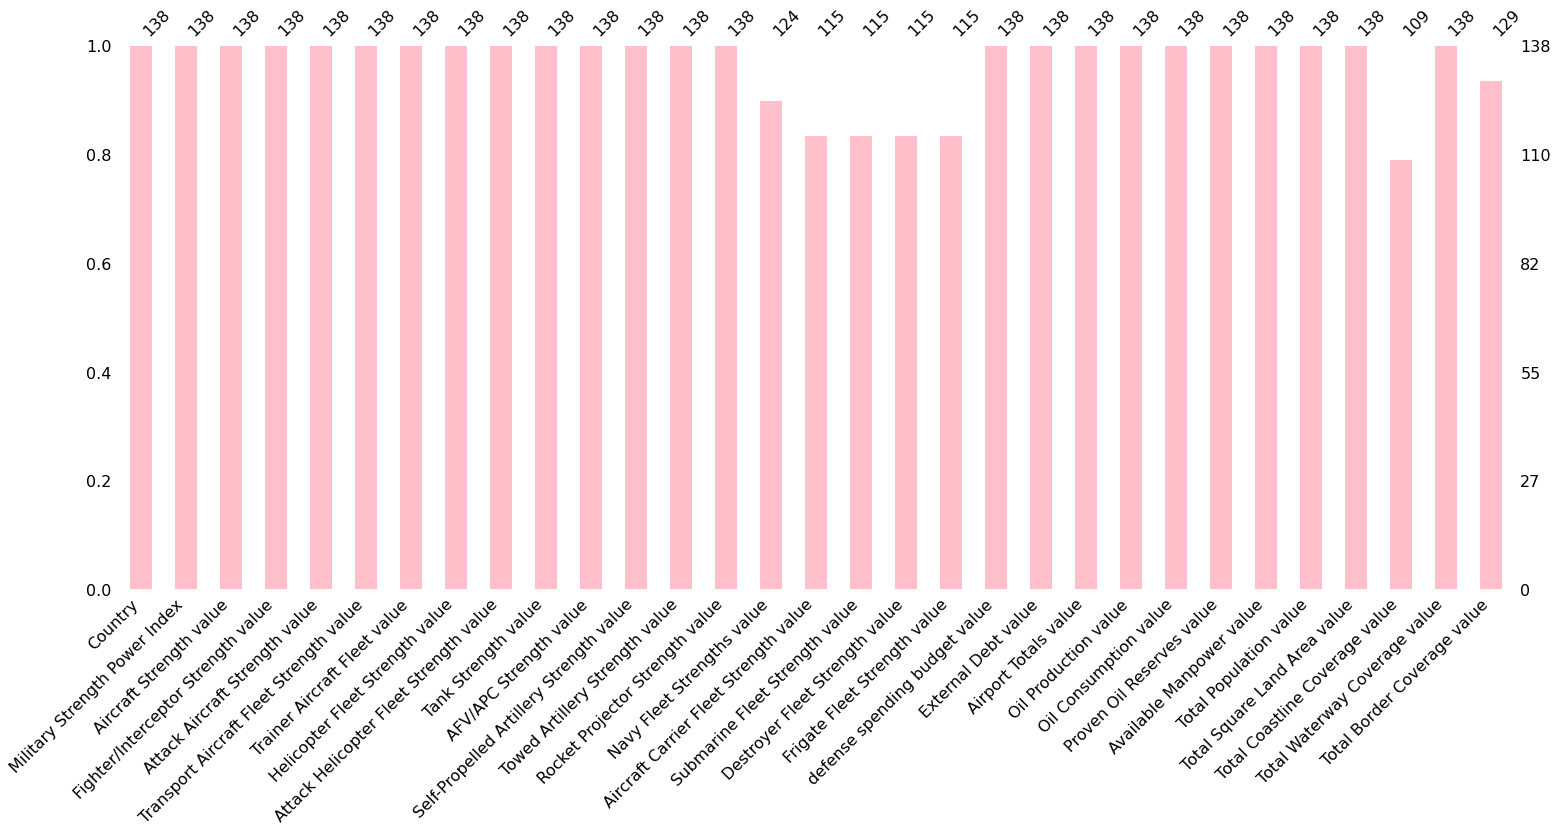

In [15]:
msno.bar(df,color='pink');

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [16]:
df[df['Navy Fleet Strengths value'].isna()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
16,Botswana,2.058,45.000,10.000,0.000,11.000,8.000,16.000,0.000,55.000,245.000,0.000,30.000,20.000,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.000,0.000,16500.000,0.000,"9,62,617","22,49,104","5,81,730",NaN,0.000,4347.000
19,Burkina Faso,1.901,16.000,0.000,3.000,1.000,4.000,8.000,2.000,0.000,350.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.000,0.000,10500.000,0.000,"78,00,000","1,97,42,715","2,74,200",NaN,0.000,3611.000
23,Central African Republic,3.289,3.000,0.000,0.000,2.000,0.000,1.000,0.000,4.000,55.000,0.000,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.000,0.000,4500.000,0.000,"23,48,581","57,45,062","6,22,984",NaN,2800.000,5920.000
24,Chad,1.638,35.000,0.000,6.000,6.000,4.000,17.000,3.000,60.000,372.000,10.000,51.000,10.000,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.000,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.000,6406.000
30,Czechia,0.553,95.000,12.000,16.000,8.000,15.000,44.000,15.000,116.000,682.000,86.000,85.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.000,2000.000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.000,NaN,664.000,2046.000
38,Ethiopia,0.858,86.000,24.000,0.000,9.000,20.000,33.000,8.000,400.000,114.000,67.000,650.000,183.000,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.000,0.000,55000.000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000
48,Hungary,0.822,47.000,12.000,0.000,5.000,6.000,24.000,8.000,30.000,944.000,0.000,300.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,08,00,00,000","1,38,10,00,00,000",41.000,14000.000,"1,45,000","2,51,00,000","46,18,081","98,25,704","1,03,000",NaN,1622.000,2106.000
62,Kyrgyzstan,1.924,5.000,0.000,0.000,0.000,0.000,5.000,2.000,150.000,385.000,30.000,141.000,21.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","8,16,40,00,000",28.000,1000.000,17200.000,"4,00,00,000","30,29,935","58,49,296","1,99,951",NaN,600.000,4573.000
71,Mali,1.894,29.000,9.000,0.000,6.000,5.000,8.000,6.000,80.000,248.000,0.000,50.000,32.000,NaN,NaN,NaN,NaN,NaN,"7,00,00,000","4,19,20,00,000",25.000,0.000,5500.000,0.000,"59,91,557","1,84,29,893","12,40,192",NaN,0.000,7908.000
74,Moldova,2.129,3.000,0.000,0.000,1.000,0.000,2.000,0.000,0.000,341.000,9.000,52.000,11.000,NaN,NaN,NaN,NaN,NaN,"3,00,00,000","6,54,90,00,000",7.000,0.000,16320.000,0.000,"20,14,503","34,37,720",33851.000,NaN,558.000,1885.000


In [17]:
df[df['Aircraft Carrier Fleet Strength value'].isna()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.000,0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000,1570.000
7,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.000,14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000,2524.000
11,Belarus,0.818,202.000,39.000,68.000,4.000,28.000,63.000,21.000,532.000,1560.000,482.000,228.000,238.000,0.000,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.000,32000.000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.000,3599.000
13,Bhutan,10.168,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,27.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.000,0.000,2000.000,0.000,"1,76,808","7,66,397",38394.000,NaN,0.000,1136.000
16,Botswana,2.058,45.000,10.000,0.000,11.000,8.000,16.000,0.000,55.000,245.000,0.000,30.000,20.000,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.000,0.000,16500.000,0.000,"9,62,617","22,49,104","5,81,730",NaN,0.000,4347.000
19,Burkina Faso,1.901,16.000,0.000,3.000,1.000,4.000,8.000,2.000,0.000,350.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.000,0.000,10500.000,0.000,"78,00,000","1,97,42,715","2,74,200",NaN,0.000,3611.000
23,Central African Republic,3.289,3.000,0.000,0.000,2.000,0.000,1.000,0.000,4.000,55.000,0.000,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.000,0.000,4500.000,0.000,"23,48,581","57,45,062","6,22,984",NaN,2800.000,5920.000
24,Chad,1.638,35.000,0.000,6.000,6.000,4.000,17.000,3.000,60.000,372.000,10.000,51.000,10.000,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.000,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.000,6406.000
30,Czechia,0.553,95.000,12.000,16.000,8.000,15.000,44.000,15.000,116.000,682.000,86.000,85.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.000,2000.000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.000,NaN,664.000,2046.000
38,Ethiopia,0.858,86.000,24.000,0.000,9.000,20.000,33.000,8.000,400.000,114.000,67.000,650.000,183.000,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.000,0.000,55000.000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [18]:
df[df['Submarine Fleet Strength value'].isna()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.000,0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000,1570.000
7,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.000,14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000,2524.000
11,Belarus,0.818,202.000,39.000,68.000,4.000,28.000,63.000,21.000,532.000,1560.000,482.000,228.000,238.000,0.000,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.000,32000.000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.000,3599.000
13,Bhutan,10.168,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,27.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.000,0.000,2000.000,0.000,"1,76,808","7,66,397",38394.000,NaN,0.000,1136.000
16,Botswana,2.058,45.000,10.000,0.000,11.000,8.000,16.000,0.000,55.000,245.000,0.000,30.000,20.000,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.000,0.000,16500.000,0.000,"9,62,617","22,49,104","5,81,730",NaN,0.000,4347.000
19,Burkina Faso,1.901,16.000,0.000,3.000,1.000,4.000,8.000,2.000,0.000,350.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.000,0.000,10500.000,0.000,"78,00,000","1,97,42,715","2,74,200",NaN,0.000,3611.000
23,Central African Republic,3.289,3.000,0.000,0.000,2.000,0.000,1.000,0.000,4.000,55.000,0.000,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.000,0.000,4500.000,0.000,"23,48,581","57,45,062","6,22,984",NaN,2800.000,5920.000
24,Chad,1.638,35.000,0.000,6.000,6.000,4.000,17.000,3.000,60.000,372.000,10.000,51.000,10.000,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.000,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.000,6406.000
30,Czechia,0.553,95.000,12.000,16.000,8.000,15.000,44.000,15.000,116.000,682.000,86.000,85.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.000,2000.000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.000,NaN,664.000,2046.000
38,Ethiopia,0.858,86.000,24.000,0.000,9.000,20.000,33.000,8.000,400.000,114.000,67.000,650.000,183.000,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.000,0.000,55000.000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [19]:
df[df['Destroyer Fleet Strength value'].isna()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.000,0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000,1570.000
7,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.000,14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000,2524.000
11,Belarus,0.818,202.000,39.000,68.000,4.000,28.000,63.000,21.000,532.000,1560.000,482.000,228.000,238.000,0.000,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.000,32000.000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.000,3599.000
13,Bhutan,10.168,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,27.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.000,0.000,2000.000,0.000,"1,76,808","7,66,397",38394.000,NaN,0.000,1136.000
16,Botswana,2.058,45.000,10.000,0.000,11.000,8.000,16.000,0.000,55.000,245.000,0.000,30.000,20.000,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.000,0.000,16500.000,0.000,"9,62,617","22,49,104","5,81,730",NaN,0.000,4347.000
19,Burkina Faso,1.901,16.000,0.000,3.000,1.000,4.000,8.000,2.000,0.000,350.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.000,0.000,10500.000,0.000,"78,00,000","1,97,42,715","2,74,200",NaN,0.000,3611.000
23,Central African Republic,3.289,3.000,0.000,0.000,2.000,0.000,1.000,0.000,4.000,55.000,0.000,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.000,0.000,4500.000,0.000,"23,48,581","57,45,062","6,22,984",NaN,2800.000,5920.000
24,Chad,1.638,35.000,0.000,6.000,6.000,4.000,17.000,3.000,60.000,372.000,10.000,51.000,10.000,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.000,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.000,6406.000
30,Czechia,0.553,95.000,12.000,16.000,8.000,15.000,44.000,15.000,116.000,682.000,86.000,85.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.000,2000.000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.000,NaN,664.000,2046.000
38,Ethiopia,0.858,86.000,24.000,0.000,9.000,20.000,33.000,8.000,400.000,114.000,67.000,650.000,183.000,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.000,0.000,55000.000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [20]:
df[df['Frigate Fleet Strength value'].isna()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.000,0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000,1570.000
7,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.000,14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000,2524.000
11,Belarus,0.818,202.000,39.000,68.000,4.000,28.000,63.000,21.000,532.000,1560.000,482.000,228.000,238.000,0.000,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.000,32000.000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.000,3599.000
13,Bhutan,10.168,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,27.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.000,0.000,2000.000,0.000,"1,76,808","7,66,397",38394.000,NaN,0.000,1136.000
16,Botswana,2.058,45.000,10.000,0.000,11.000,8.000,16.000,0.000,55.000,245.000,0.000,30.000,20.000,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.000,0.000,16500.000,0.000,"9,62,617","22,49,104","5,81,730",NaN,0.000,4347.000
19,Burkina Faso,1.901,16.000,0.000,3.000,1.000,4.000,8.000,2.000,0.000,350.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.000,0.000,10500.000,0.000,"78,00,000","1,97,42,715","2,74,200",NaN,0.000,3611.000
23,Central African Republic,3.289,3.000,0.000,0.000,2.000,0.000,1.000,0.000,4.000,55.000,0.000,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.000,0.000,4500.000,0.000,"23,48,581","57,45,062","6,22,984",NaN,2800.000,5920.000
24,Chad,1.638,35.000,0.000,6.000,6.000,4.000,17.000,3.000,60.000,372.000,10.000,51.000,10.000,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.000,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.000,6406.000
30,Czechia,0.553,95.000,12.000,16.000,8.000,15.000,44.000,15.000,116.000,682.000,86.000,85.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.000,2000.000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.000,NaN,664.000,2046.000
38,Ethiopia,0.858,86.000,24.000,0.000,9.000,20.000,33.000,8.000,400.000,114.000,67.000,650.000,183.000,NaN,NaN,NaN,NaN,NaN,"35,00,00,000","26,05,00,00,000",57.000,0.000,55000.000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [21]:
df.iloc[110,15]=2
df.iloc[110,16]=19
df.iloc[110,17]=12
df.iloc[110,18]=12

In [22]:
df[df['Total Coastline Coverage value'].isna()==True]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.000,0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000,1570.000
7,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.000,14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000,2524.000
11,Belarus,0.818,202.000,39.000,68.000,4.000,28.000,63.000,21.000,532.000,1560.000,482.000,228.000,238.000,0.000,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.000,32000.000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.000,3599.000
13,Bhutan,10.168,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,27.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.000,0.000,2000.000,0.000,"1,76,808","7,66,397",38394.000,NaN,0.000,1136.000
14,Bolivia,0.994,69.000,0.000,0.000,14.000,23.000,38.000,0.000,54.000,137.000,0.000,86.000,0.000,173.000,0.000,0.000,0.000,0.000,"66,00,00,000","12,81,00,00,000",855.000,59330.000,60000.000,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.000,7252.000
16,Botswana,2.058,45.000,10.000,0.000,11.000,8.000,16.000,0.000,55.000,245.000,0.000,30.000,20.000,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.000,0.000,16500.000,0.000,"9,62,617","22,49,104","5,81,730",NaN,0.000,4347.000
19,Burkina Faso,1.901,16.000,0.000,3.000,1.000,4.000,8.000,2.000,0.000,350.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.000,0.000,10500.000,0.000,"78,00,000","1,97,42,715","2,74,200",NaN,0.000,3611.000
23,Central African Republic,3.289,3.000,0.000,0.000,2.000,0.000,1.000,0.000,4.000,55.000,0.000,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.000,0.000,4500.000,0.000,"23,48,581","57,45,062","6,22,984",NaN,2800.000,5920.000
24,Chad,1.638,35.000,0.000,6.000,6.000,4.000,17.000,3.000,60.000,372.000,10.000,51.000,10.000,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.000,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.000,6406.000
30,Czechia,0.553,95.000,12.000,16.000,8.000,15.000,44.000,15.000,116.000,682.000,86.000,85.000,0.000,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.000,2000.000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.000,NaN,664.000,2046.000


In [23]:
df[df['Total Border Coverage value'].isna()==True] 

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
6,Australia,0.323,464.000,82.000,6.000,38.000,174.000,133.000,22.000,59.000,3051.000,0.000,54.000,0.000,48.000,2.000,6.000,2.000,8.000,"26,30,00,00,000","17,14,00,00,00,000",480.000,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.000,2000.000,NaN
9,Bahrain,1.855,109.000,17.000,0.000,2.000,37.000,65.000,22.000,180.000,843.000,33.000,26.000,17.000,39.000,0.000,0.000,0.000,1.000,"1,41,50,00,000","52,15,00,00,000",4.000,45000.000,55000.000,"12,46,00,000","8,06,505","14,22,659",760.000,161.000,0.000,NaN
57,Japan,0.150,1561.000,279.000,12.000,60.000,427.000,637.000,119.000,1004.000,3130.000,238.000,500.000,99.000,155.000,4.000,20.000,40.000,0.000,"49,00,00,00,000","32,40,00,00,00,000",175.000,3841.000,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751.000,1770.000,NaN
69,Madagascar,3.087,6.000,0.000,0.000,0.000,0.000,6.000,0.000,12.000,103.000,0.000,25.000,0.000,8.000,0.000,0.000,0.000,0.000,"11,50,00,000","4,08,90,00,000",83.000,0.000,18500.000,0.000,"1,01,45,026","2,56,83,610","5,87,040",4828.000,600.000,NaN
83,New Zealand,1.368,48.000,0.000,0.000,7.000,13.000,22.000,0.000,0.000,200.000,0.000,24.000,0.000,11.000,0.000,0.000,0.000,2.000,"4,30,00,00,000","91,62,00,00,000",123.000,31480.000,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.000,0.000,NaN
95,Philippines,0.785,171.000,0.000,19.000,23.000,24.000,97.000,0.000,7.000,513.000,0.000,286.000,0.000,103.000,0.000,0.000,0.000,2.000,"3,47,00,00,000","76,18,00,00,000",247.000,15000.000,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289.000,3219.000,NaN
105,Singapore,0.797,235.000,100.000,0.000,9.000,36.000,77.000,17.000,180.000,3000.000,48.000,77.000,24.000,40.000,0.000,0.000,0.000,6.000,"11,20,00,00,000","5,66,10,00,00,000",9.000,0.000,"13,40,000",0.000,"40,17,314","59,95,991",697.000,193.000,10.000,NaN
113,Sri Lanka,1.466,77.000,0.000,0.000,15.000,6.000,54.000,9.000,202.000,570.000,0.000,209.000,22.000,40.000,0.000,0.000,0.000,0.000,"2,50,00,00,000","51,72,00,00,000",19.000,0.000,90000.000,0.000,"1,09,27,071","2,25,76,592",65610.000,1340.000,160.000,NaN
119,Taiwan,0.401,744.000,289.000,0.000,19.000,207.000,210.000,91.000,1180.000,2000.000,482.000,1160.000,115.000,117.000,0.000,4.000,4.000,22.000,"10,72,50,00,000","1,81,90,00,00,000",37.000,196.000,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980.000,1566.000,3720.000,NaN


In [24]:
df = df.fillna(0)

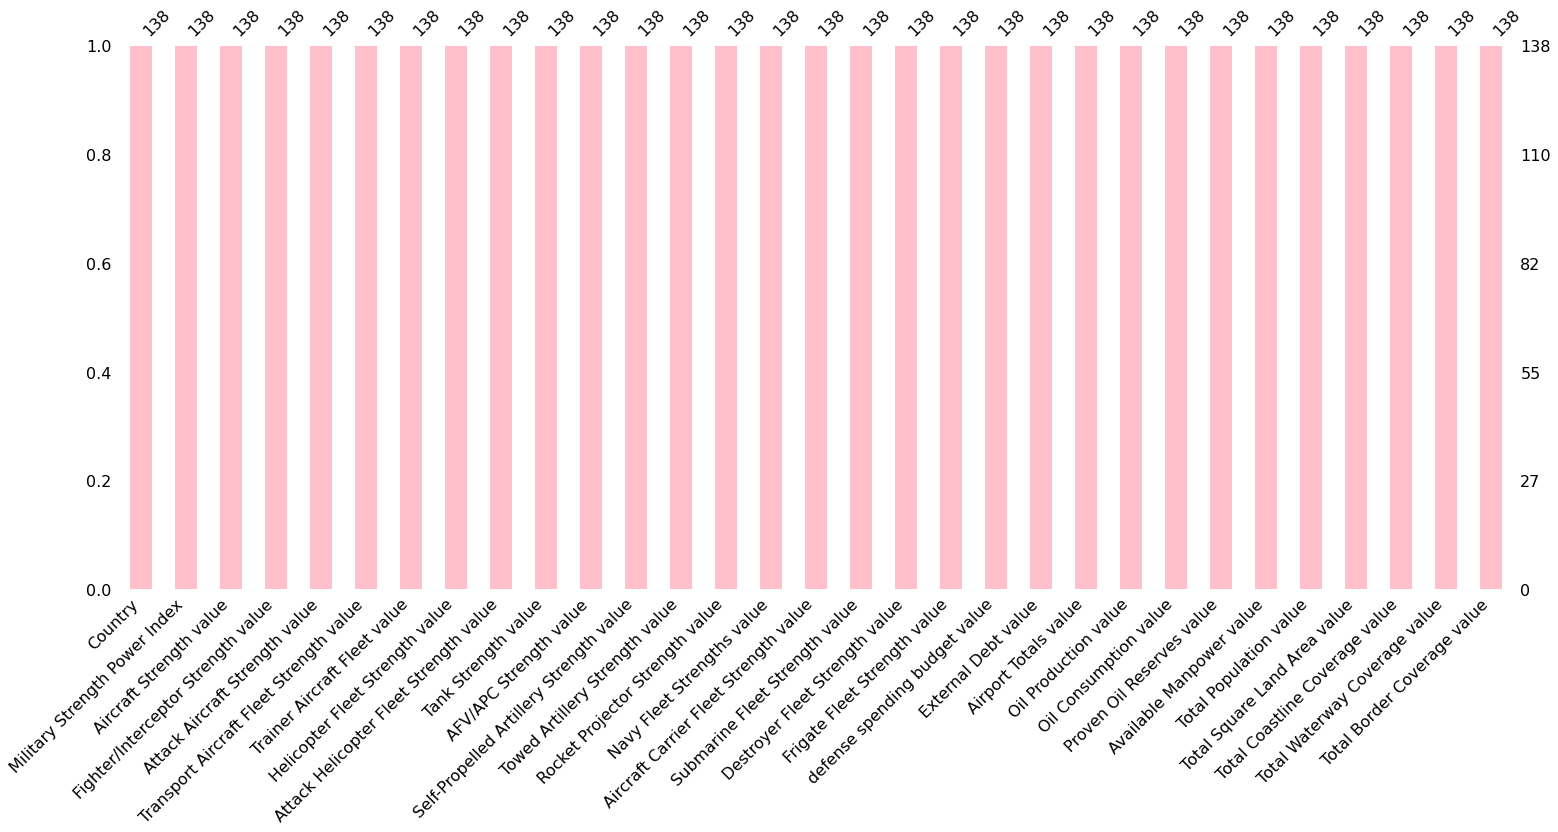

In [25]:
msno.bar(df,color='pink');

In [26]:
df.isna().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [28]:
df.sample(10)

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
32,Denmark,0.788,113.000,33.000,0.000,4.000,38.000,35.000,0.000,57.000,972.000,22.000,0.000,0.000,74.000,0.000,0.000,0.000,9.000,"4,76,00,00,000","4,84,80,00,00,000",80.000,"1,37,100","1,62,000","49,06,00,000","25,90,457","58,09,502",43094.000,7314.000,400.000,140.000
12,Belgium,1.050,148.000,43.000,0.000,12.000,64.000,29.000,0.000,0.000,984.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,2.000,"4,92,10,00,000","12,81,00,00,00,000",41.000,0.000,"6,45,000",0.000,"48,33,107","1,15,70,762",30528.000,67.000,2043.000,1297.000
6,Australia,0.323,464.000,82.000,6.000,38.000,174.000,133.000,22.000,59.000,3051.000,0.000,54.000,0.000,48.000,2.000,6.000,2.000,8.000,"26,30,00,00,000","17,14,00,00,00,000",480.000,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.000,2000.000,0.000
105,Singapore,0.797,235.000,100.000,0.000,9.000,36.000,77.000,17.000,180.000,3000.000,48.000,77.000,24.000,40.000,0.000,0.000,0.000,6.000,"11,20,00,00,000","5,66,10,00,00,000",9.000,0.000,"13,40,000",0.000,"40,17,314","59,95,991",697.000,193.000,10.000,0.000
91,Pakistan,0.236,1372.000,356.000,90.000,49.000,513.000,346.000,56.000,2200.000,7330.000,429.000,1226.000,100.000,100.000,0.000,8.000,0.000,9.000,"11,40,00,00,000","82,19,00,00,000",151.000,89720.000,"5,75,000","35,06,00,000","9,63,44,277","20,78,62,518","7,96,095",1046.000,25220.000,7257.000
118,Syria,0.824,456.000,199.000,20.000,5.000,67.000,165.000,27.000,4135.000,5370.000,575.000,2550.000,750.000,56.000,0.000,0.000,0.000,2.000,"1,80,00,00,000","4,98,90,00,000",90.000,14000.000,"2,60,000","2,50,00,00,000","1,24,50,728","1,94,54,263","1,85,180",193.000,900.000,2363.000
44,Ghana,2.055,24.000,0.000,0.000,3.000,6.000,13.000,0.000,0.000,150.000,0.000,0.000,0.000,20.000,0.000,0.000,0.000,0.000,"71,00,00,000","22,14,00,00,000",10.000,"1,51,000",65000.000,"66,00,00,000","1,25,61,805","2,81,02,471","2,38,533",539.000,1293.000,2420.000
87,North Korea,0.372,949.000,458.000,114.000,4.000,169.000,204.000,20.000,6045.000,10000.000,800.000,1000.000,2110.000,984.000,0.000,83.000,0.000,11.000,"1,60,00,00,000","5,00,00,00,000",82.000,0.000,15500.000,0.000,"1,30,45,878","2,53,81,085","1,20,538",2495.000,2250.000,1607.000
83,New Zealand,1.368,48.000,0.000,0.000,7.000,13.000,22.000,0.000,0.000,200.000,0.000,24.000,0.000,11.000,0.000,0.000,0.000,2.000,"4,30,00,00,000","91,62,00,00,000",123.000,31480.000,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.000,0.000,0.000
59,Kazakhstan,0.910,222.000,76.000,39.000,18.000,18.000,71.000,18.000,650.000,800.000,0.000,300.000,100.000,15.000,0.000,0.000,0.000,0.000,"4,00,00,00,000","1,67,50,00,00,000",96.000,"17,77,000","2,45,000","30,00,00,00,000","85,85,003","1,87,44,548","27,24,900",26.000,0.000,13364.000


In [29]:
df = df.apply(lambda x : x.astype('str').str.replace(',',''))

In [30]:
df.head(1)

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0


In [31]:
df = df.iloc[:,1:].astype('float64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

In [33]:
df['Country'] = df0['Military Strength']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [35]:
df.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

In [36]:
df.drop(['Total Square Land Area value', 'Total Coastline Coverage value','Total Waterway Coverage value', 'Total Border Coverage value'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Visualy inspect the some features

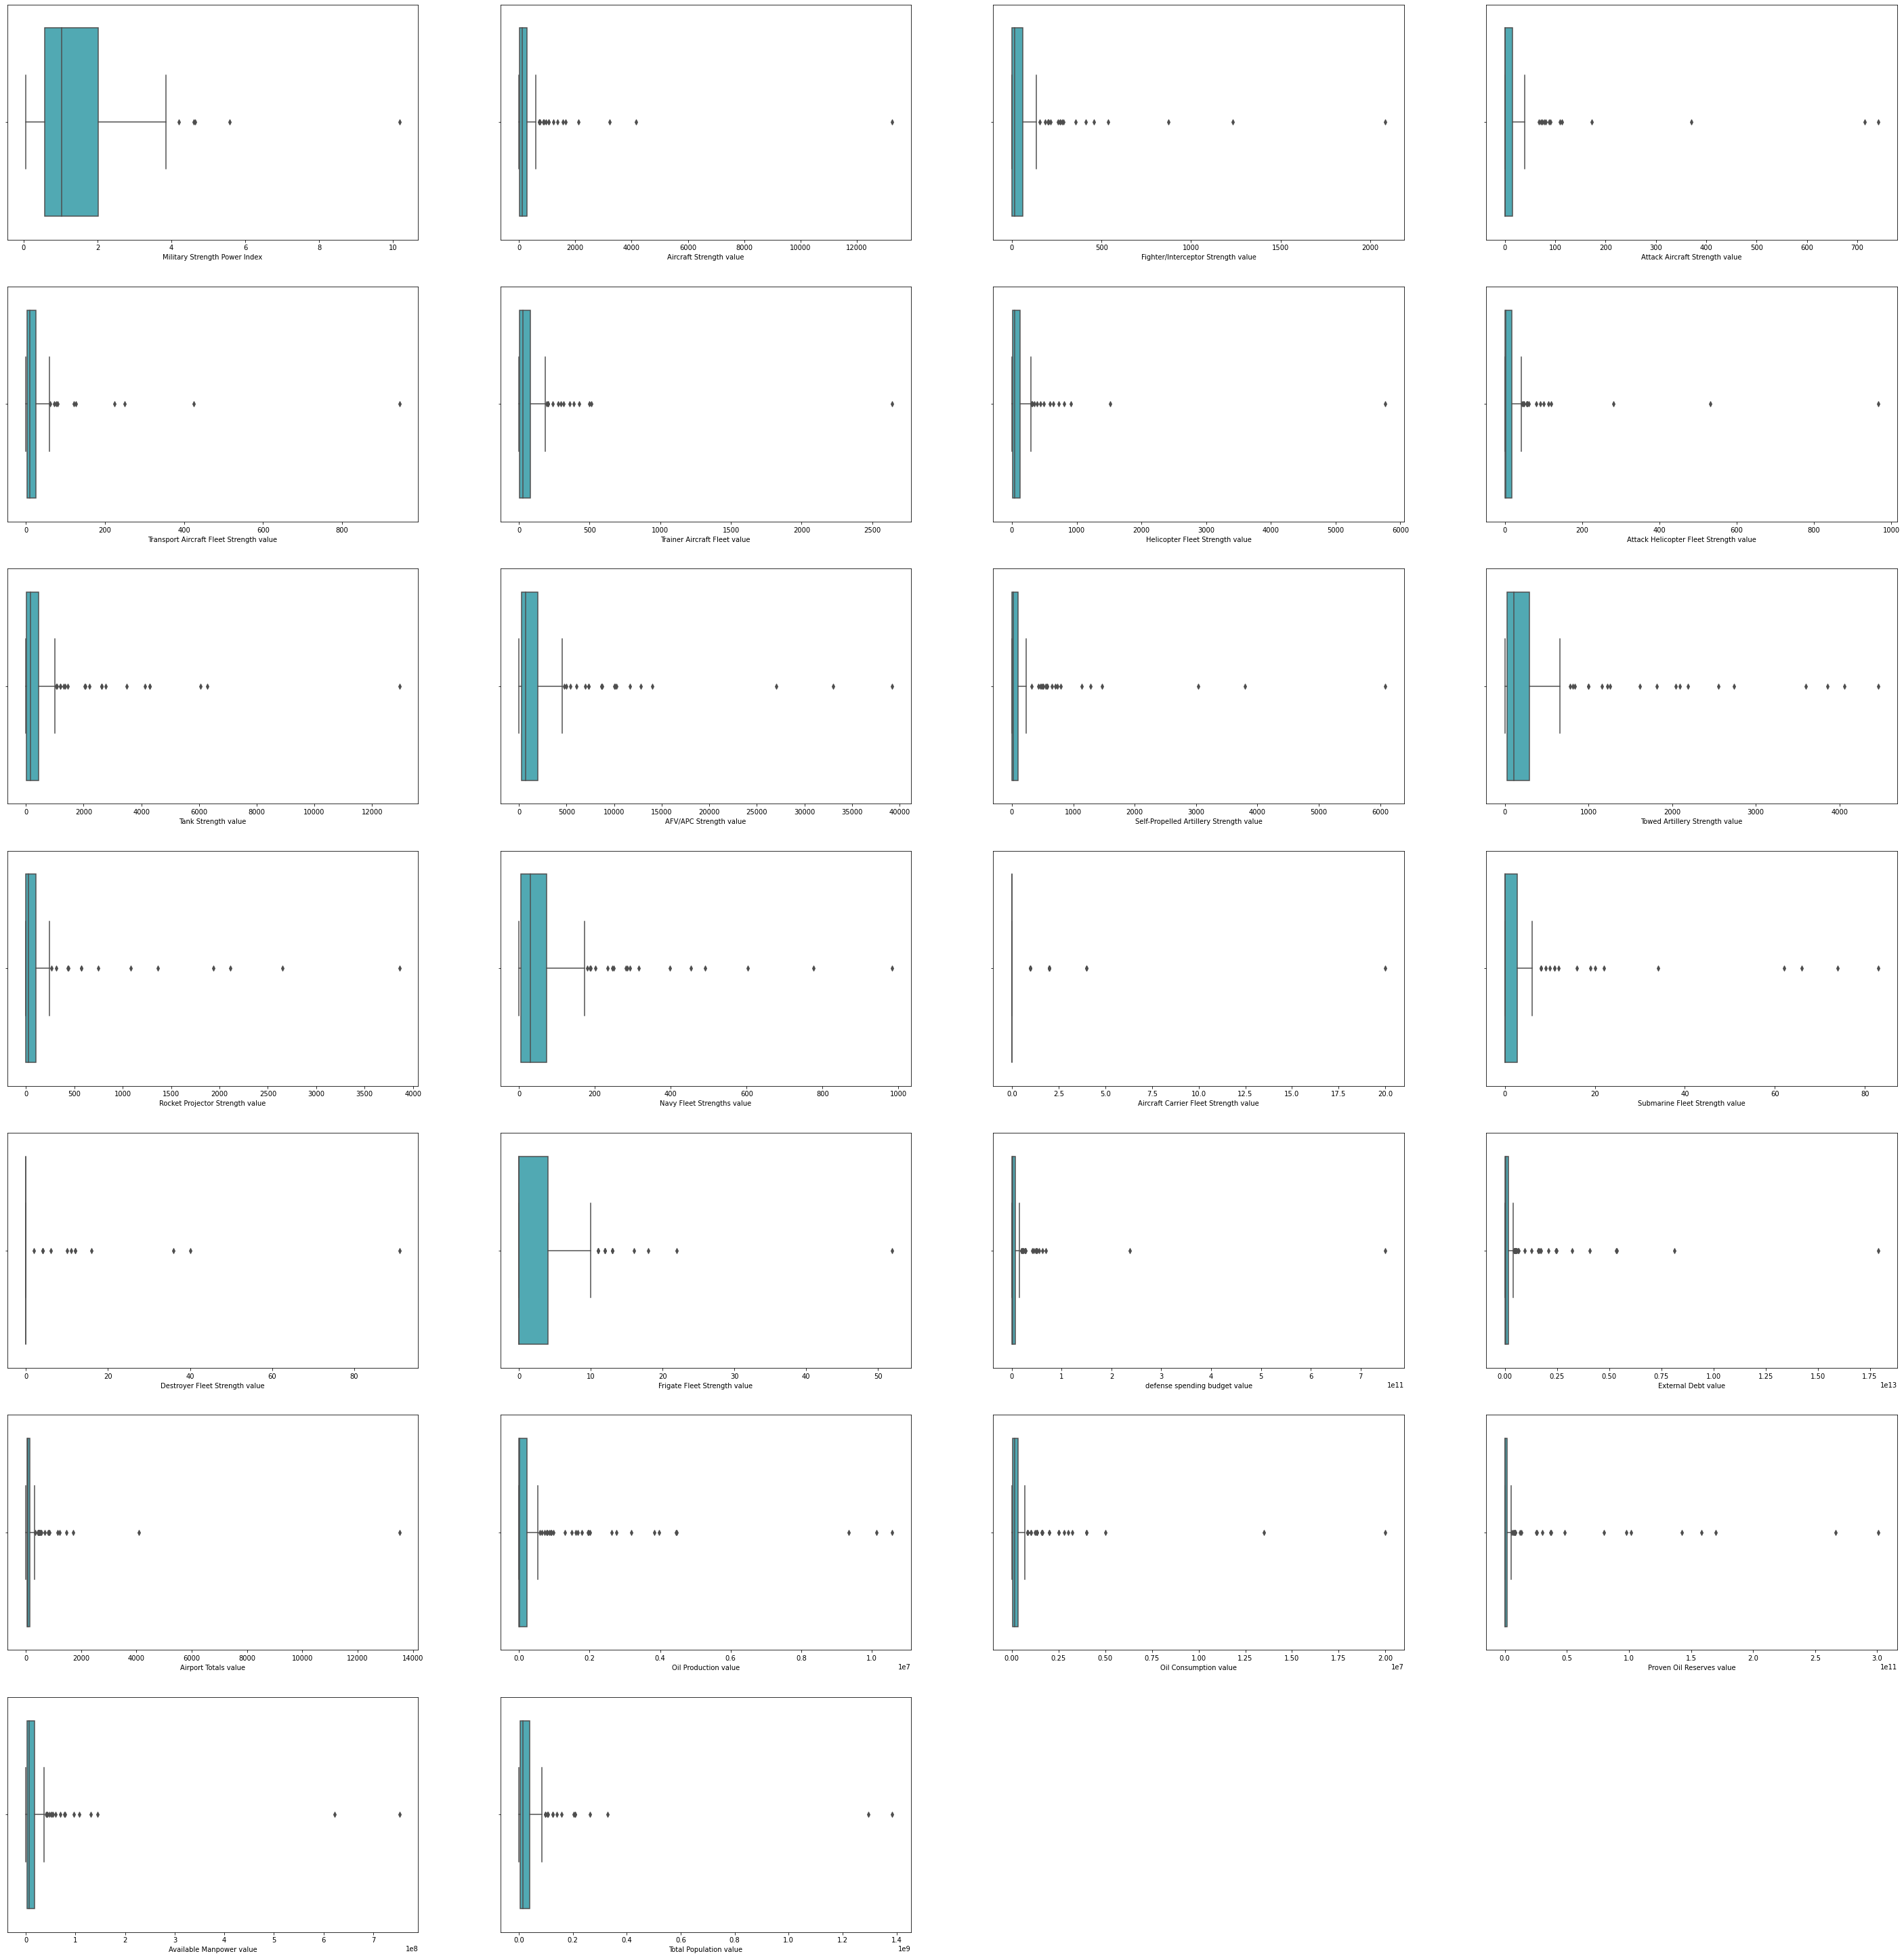

In [38]:
index = 0
plt.figure(figsize=(50,60))
for feature in df.columns:
    if feature != 'Country':
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x=feature, data=df, palette="YlGnBu")

(26.5, -0.5)

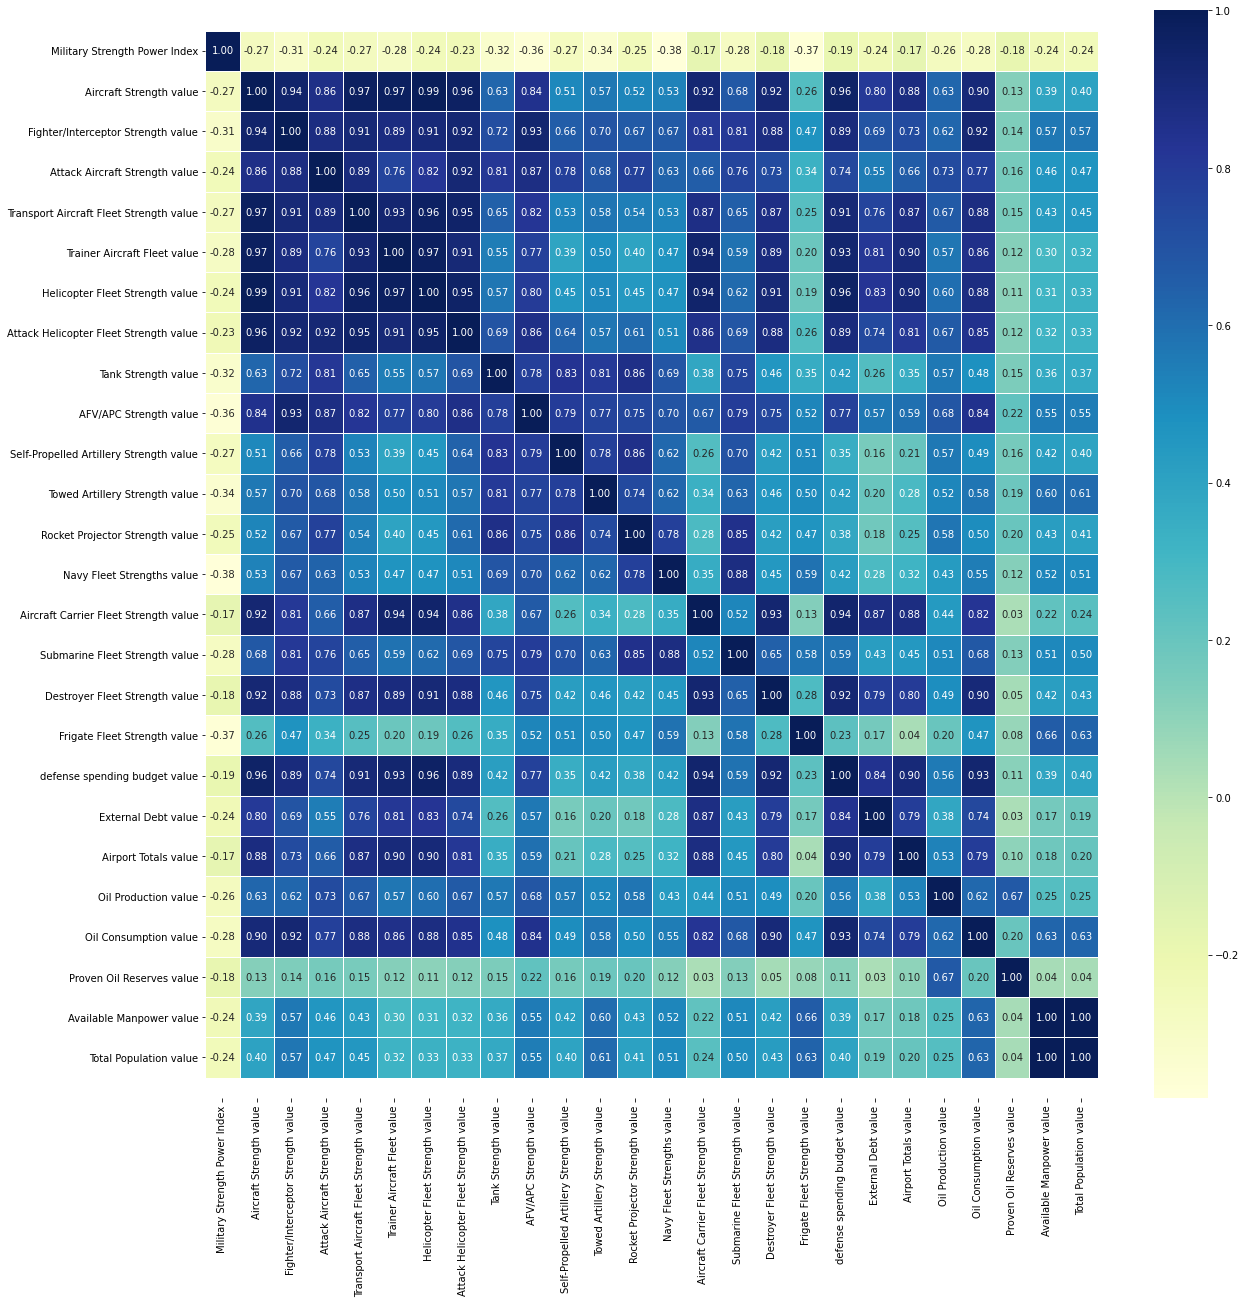

In [39]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Decriptive statistics

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
Aircraft Strength value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
Fighter/Interceptor Strength value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
Attack Aircraft Strength value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
Transport Aircraft Fleet Strength value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
Trainer Aircraft Fleet value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
Helicopter Fleet Strength value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
Attack Helicopter Fleet Strength value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
Tank Strength value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
AFV/APC Strength value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


# Data Preprocessing

In [120]:
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)

In [121]:
X = df.drop('Country',axis=1)

In [126]:
X.shape

(138, 26)

In [127]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [129]:
from pyclustertend import hopkins

In [130]:
hopkins(X, X.shape[0])

0.07449239381524851

## Clustering with K-means

In [ ]:
from sklearn.cluster import KMeans

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [131]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

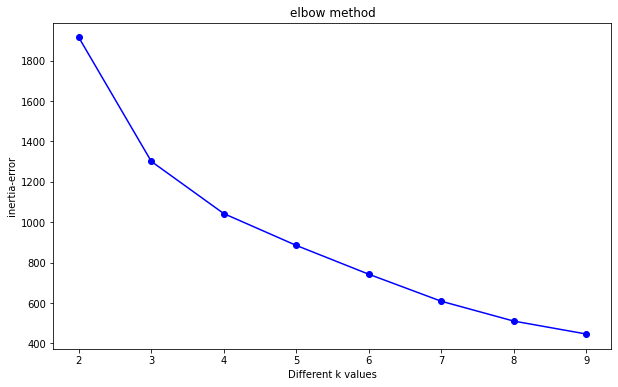

In [132]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [133]:
ssd

[1914.184891501803,
 1301.0530805880012,
 1042.7765545623654,
 885.4371064046069,
 742.8685604827326,
 609.2339537571945,
 511.0085106405984,
 447.0797271046005]

In [134]:
pd.Series(ssd).diff()

0        NaN
1   -613.132
2   -258.277
3   -157.339
4   -142.569
5   -133.635
6    -98.225
7    -63.929
dtype: float64

In [135]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,613.132
3,258.277
4,157.339
5,142.569
6,133.635
7,98.225
8,63.929


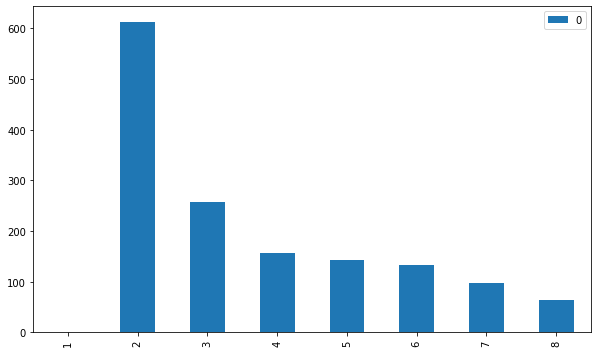

In [136]:
df_diff.plot(kind='bar');

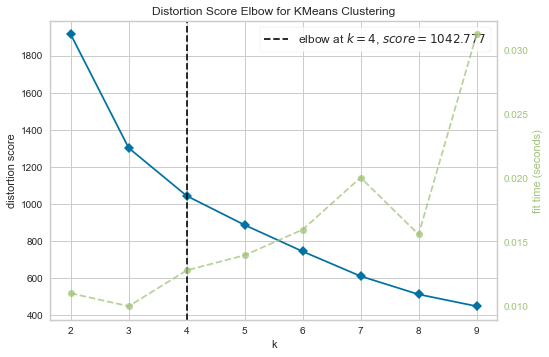

In [138]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        
visualizer.show();

### Model Building and label visualisation

In [141]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [142]:
model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [145]:
df['cluster']=model.labels_

plt.figure(figsize=(10,5))
sns.scatterplot(df["Aircraft Strength value"], 
                df["Navy Fleet Strengths value"], hue= df.cluster,palette= "viridis");

In [151]:
df[df['cluster']==0]['Country']

0                           Afghanistan
1                               Albania
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
23             Central African Republic
24                                 Chad
25                                Chile
28                              Croatia
29                                 Cuba


In [152]:
df[df['cluster']==1]['Country']

130    United States
Name: Country, dtype: object

In [153]:
df[df['cluster']==2]['Country']

26      China
101    Russia
Name: Country, dtype: object

In [154]:
df[df['cluster']==3]['Country']

2                   Algeria
17                   Brazil
22                   Canada
27                 Colombia
35                    Egypt
40                   France
43                  Germany
45                   Greece
49                    India
50                Indonesia
51                     Iran
52                     Iraq
54                   Israel
55                    Italy
57                    Japan
73                   Mexico
87              North Korea
91                 Pakistan
102            Saudi Arabia
110             South Korea
112                   Spain
118                   Syria
119                  Taiwan
122                Thailand
124                  Turkey
127                 Ukraine
128    United Arab Emirates
129          United Kingdom
133               Venezuela
134                 Vietnam
Name: Country, dtype: object

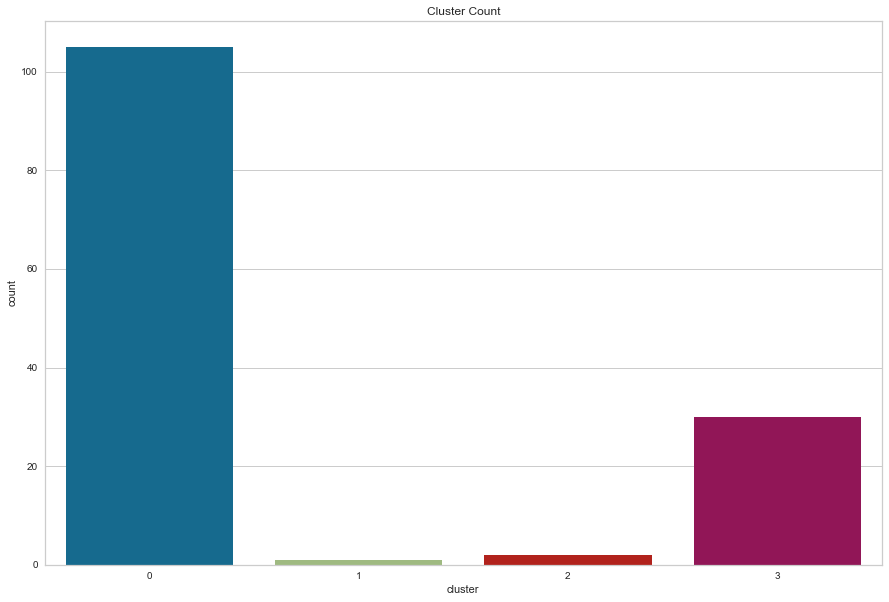

In [160]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)
plt.show();

### Evaluate 

In [161]:
from sklearn.metrics import silhouette_score

In [163]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df.cluster)}') # towards to 1 means, data good clustered by model


Silhouette Score(n=4): 0.49398606415653984


In [164]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8632914835263383
For n_clusters=3, the silhouette score is 0.8176766569009525
For n_clusters=4, the silhouette score is 0.49398606415653984
For n_clusters=5, the silhouette score is 0.5161334351380924
For n_clusters=6, the silhouette score is 0.5112329338428312
For n_clusters=7, the silhouette score is 0.47671776771417657
For n_clusters=8, the silhouette score is 0.46697893077241615


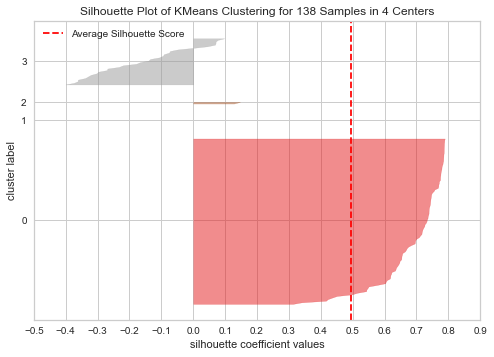

In [165]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## Hierarchical Clustering

In [166]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [167]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

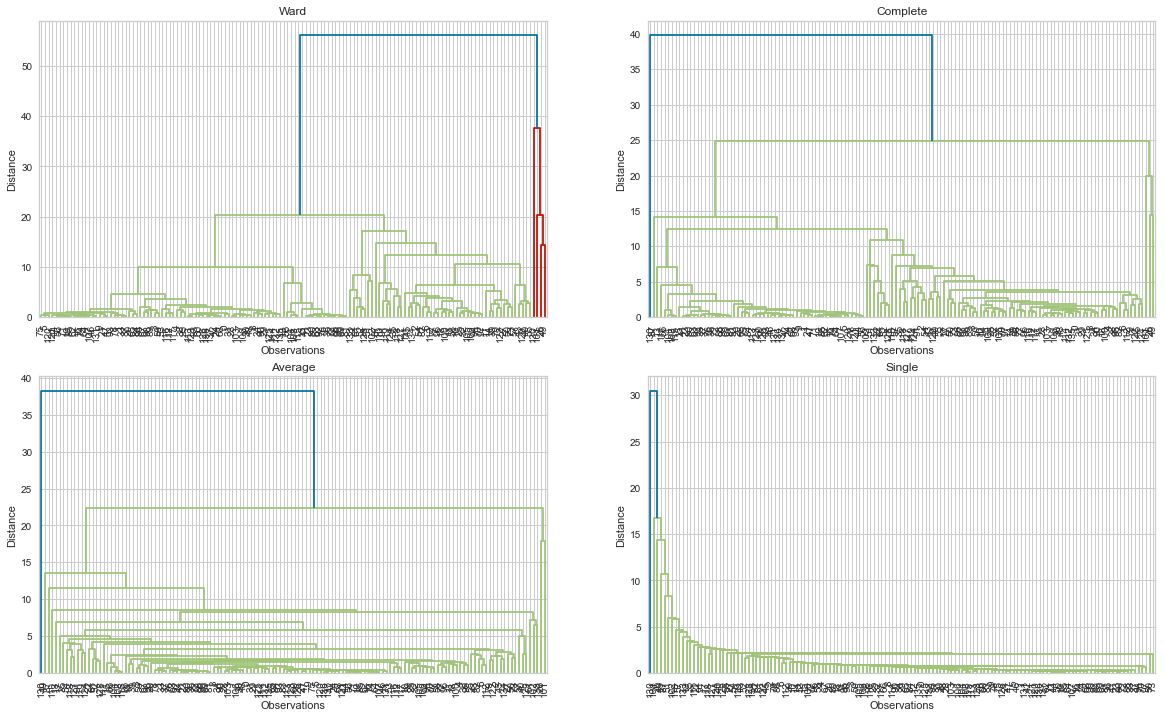

In [168]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [169]:
from sklearn.cluster import AgglomerativeClustering

In [170]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [171]:
df["cluster_1"] = model1.labels_

### Evaluate 

In [172]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.8454282080779242
Silhouette Score for 3 clusters: 0.8176766569009525
Silhouette Score for 4 clusters: 0.33642440137479285
Silhouette Score for 5 clusters: 0.33625752752729626
Silhouette Score for 6 clusters: 0.34808700712119006
Silhouette Score for 7 clusters: 0.346433067244715
Silhouette Score for 8 clusters: 0.3458381249661548
Silhouette Score for 9 clusters: 0.3322520381689876
